In [84]:
import cartopy.crs as ccrs
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as special

In [68]:
import iris
from iris.coords import DimCoord
from iris.cube import Cube

import numpy as np

cs = iris.coord_systems.GeogCS(6371229)
N = 216
dx = 360 / (2 * N)
dy = 180 / (1.5 * N)
latitude = DimCoord(np.linspace(-90 + dy / 2, 90 - dy / 2, int(1.5 * N)),
                    standard_name='latitude',
                    units='degrees',
                    coord_system=cs)
longitude = DimCoord(np.linspace(dx / 2, 360 - dx / 2, 2 * N),
                     standard_name='longitude',
                     units='degrees',
                     coord_system=cs)

Lon, Lat = np.meshgrid(longitude.points, latitude.points)


latitude.guess_bounds()
longitude.guess_bounds()
cube = Cube(np.zeros((int(1.5 * N), 2 * N), np.float32),
            dim_coords_and_dims=[(latitude, 0),
                                 (longitude, 1)])

cube.data[160:170, 0:10] = 10

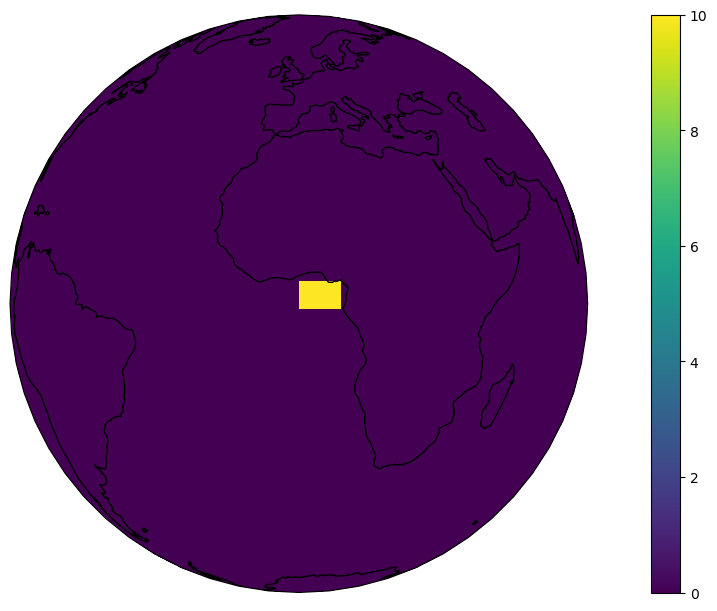

In [65]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(0, 0)}, layout='constrained')
fig.set_size_inches(14, 6)
im = ax.pcolormesh(cube.coord('longitude').points, cube.coord('latitude').points, cube.data, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(im)

In [79]:
def cube_integral(cube):
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return (grid_areas * cube.data).sum()

def inner_product(cube, Y):
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return (grid_areas * cube.data * Y).sum() / grid_areas.sum()
    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
N = 216
x = np.linspace(0, 360, N * 2 + 1)
y = np.linspace(-90, 90, int(N * 1.5) + 1)
X, Y = np.meshgrid(x, y)

In [86]:

def Ymn(m, n, lon, lat):
    theta = lon * np.pi / 180
    phi = (90 - lat) * np.pi / 180
    return special.sph_harm(m, n, theta, phi).real

# theta = X * np.pi / 180
# phi = Y * np.pi / 180

0 0
1 -1
1 0
1 1
2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3


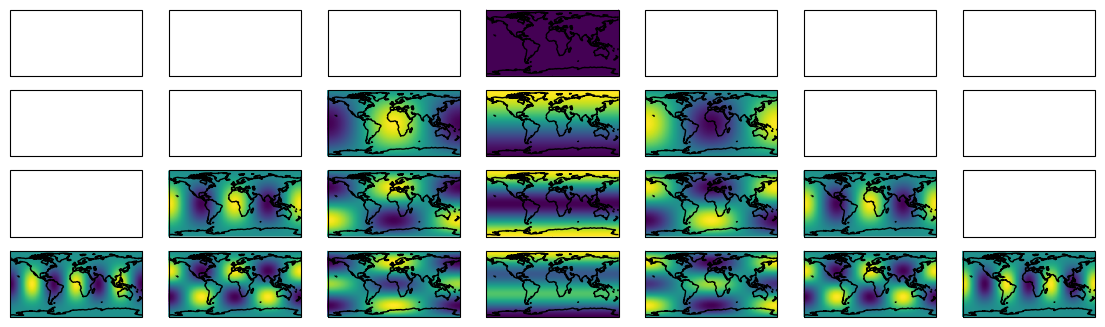

In [59]:
N = 4
fig, axes = plt.subplots(N, N * 2 - 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(14, 4)
mid = N - 1

for n in range(N):
    for m in range(-n, n + 1):
        print(n, m)
        ax = axes[n, m + mid]
        ax.pcolormesh(X, Y, Ymn(m, n, X, Y))
        ax.coastlines()
                      
                         
        



In [87]:
N = 20
fmn = {}
for n in range(N):
    fmn[n] = {}
    for m in range(-n, n + 1):
        print(n, m)
        fmn[n][m] = inner_product(cube, Ymn(m, n, Lon, Lat))
        
clear_output()

In [88]:
f = np.zeros_like(cube.data)
for n in range(N):
    for m in range(-n, n + 1):
        print(n, m)

        f += fmn[n][m] * Ymn(m, n, Lon, Lat)
        
clear_output()

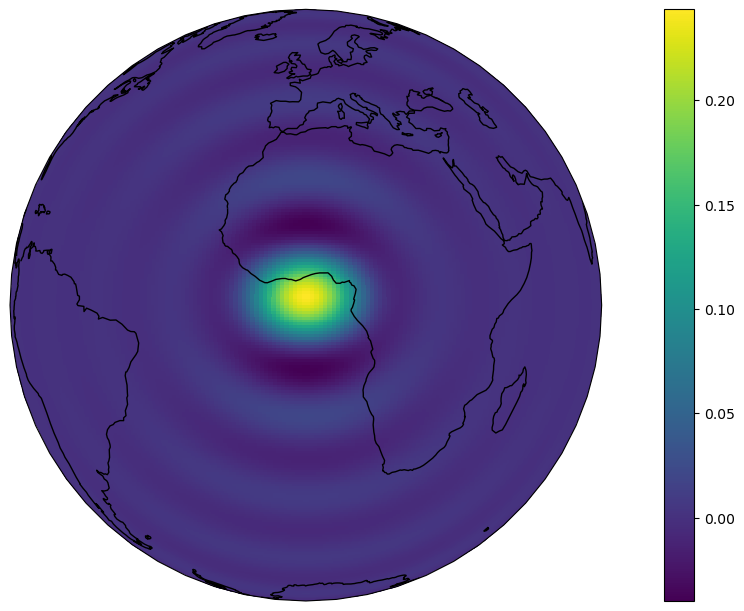

In [89]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(0, 0)}, layout='constrained')
fig.set_size_inches(14, 6)
im = ax.pcolormesh(cube.coord('longitude').points, cube.coord('latitude').points, f, transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(im)

In [21]:
Yml = special.sph_harm

In [25]:
Yml(-1, 1, theta, phi).real

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00334995, 0.0033496 , 0.00334854, ..., 0.00334854, 0.0033496 ,
        0.00334995],
       [0.00669959, 0.00669888, 0.00669676, ..., 0.00669676, 0.00669888,
        0.00669959],
       ...,
       [0.00669959, 0.00669888, 0.00669676, ..., 0.00669676, 0.00669888,
        0.00669959],
       [0.00334995, 0.0033496 , 0.00334854, ..., 0.00334854, 0.0033496 ,
        0.00334995],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

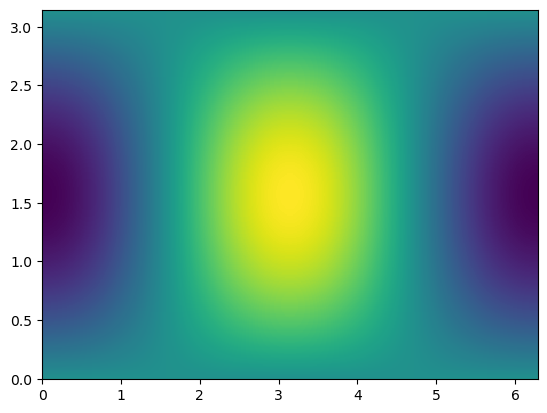

In [46]:
plt.pcolormesh(theta, phi, Yml(1, 1, theta, phi).real)

In [47]:
def Ymn(m, n, lon, lat):
    theta = lon * np.pi / 180
    phi = (90 - lat) * np.pi / 180
    return special.sph_harm(m, n, theta, phi).real

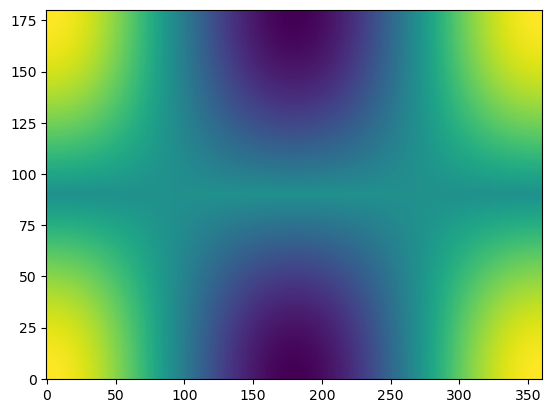

In [52]:
plt.pcolormesh(X, Y, Ymn(-1, 1, X, Y).real)